In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [2]:
resultsDir = "/users/PAS2164/deligkaris/MICROSIM/SIMULATIONS/PRELIMINARY-TRIALS-100-CV-ALL-DEMENTIA-ALL"
os.chdir(resultsDir)

In [3]:
data=pd.read_csv("inputLog.csv")

In [4]:
data.head() 

,reg,se,pvalue,duration,sampleSize,outcome,analysis,dementiaRisk,cvRisk
0,-28.609674,1.130140e+06,0.99998,3,100,death,logisticRegression-death,2.484584e-08,0.000001
1,NaN,NaN,NaN,3,100,death,logisticRegression-death,2.484584e-08,0.000001
2,NaN,NaN,NaN,3,100,death,logisticRegression-death,2.484584e-08,0.000001
3,NaN,NaN,NaN,3,100,death,logisticRegression-death,2.484584e-08,0.000001
4,NaN,NaN,NaN,3,100,death,logisticRegression-death,2.484584e-08,0.000001


In [5]:
data.shape

(600000, 9)

In [6]:
 data["reg"].isna().sum()

13764

In [7]:
results = data.dropna(axis=0)

In [8]:
results["reg"].describe()

count    5.862360e+05
mean    -1.195978e-01
std      3.444509e+00
min     -3.027138e+01
25%     -1.315891e-01
50%     -5.273559e-16
75%      1.000000e-01
max      2.997243e+01
Name: reg, dtype: float64

In [9]:
results.sample(10)

,reg,se,pvalue,duration,sampleSize,outcome,analysis,dementiaRisk,cvRisk
284081,-2.900000e-01,0.330929,0.381918,3,200,_gcp-mean,linearRegression-_gcp-mean,1.291727e-03,0.000819
414499,1.400000e-01,0.096138,0.146908,5,200,_qalys-sum,linearRegression-_qalys-sum,5.870510e-03,0.002619
276272,5.105996e-01,0.206380,0.013358,3,10000,death,logisticRegression-death,1.291727e-03,0.000819
75803,-1.602782e-01,0.057520,0.005329,20,5000,deathstroke-mi-dementia-,logisticRegression-deathstroke-mi-dementia-,2.484584e-08,0.006091
252901,4.246835e-16,1.417051,1.000000,10,500,death,logisticRegression-death,1.291727e-03,0.000001
312962,1.836986e-01,0.162243,0.257532,10,1000,death,logisticRegression-death,1.291727e-03,0.006091
21794,-1.040000e-01,0.094653,0.272141,20,1000,_gcp-mean,linearRegression-_gcp-mean,2.484584e-08,0.000001
277749,1.611193e-01,0.284262,0.570850,20,500,death,logisticRegression-death,1.291727e-03,0.000819
279680,-4.033929e-16,0.336051,1.000000,20,200,deathstroke-mi-dementia-,logisticRegression-deathstroke-mi-dementia-,1.291727e-03,0.000819
334906,1.480000e-01,0.669710,0.825190,10,500,_gcp-last,linearRegression-_gcp-last,1.291727e-03,0.006091


In [10]:
results.dropna(axis=0).shape

(586236, 9)

In [11]:
outcomes=results["outcome"].unique()
dementiaRisks=results["dementiaRisk"].unique()
cvRisks=results["cvRisk"].unique()
sampleSizes=results["sampleSize"].unique()
durations=results["duration"].unique()

In [16]:
results.loc[ (results["outcome"]==outcomes[0]) & (results["sampleSize"]==sampleSizes[0]) &
             (results["dementiaRisk"]==dementiaRisks[0]) & (results["cvRisk"]==cvRisks[0]) &
            (results["duration"]==durations[0]) ]["reg"].iloc[1]

1.6662899969504244e-16

In [21]:
meanReg={}
results["runMeanReg"]=np.nan
for outcome in outcomes:    
    for duration in durations:
        for sampleSize in sampleSizes:
            meanReg[f"{outcome},{duration},{sampleSize}"]=np.zeros((len(cvRisks),len(dementiaRisks)))
            for iCvRisk in range(len(cvRisks)):
                for iDementiaRisk in range(len(dementiaRisks)):
                    dfForParameters=results.loc[ (results["outcome"]==outcome) & (results["sampleSize"]==sampleSize) &
                                 (results["dementiaRisk"]==dementiaRisks[iDementiaRisk]) & 
                                 (results["cvRisk"]==cvRisks[iCvRisk]) &
                                 (results["duration"]==duration) ]
                    regs=dfForParameters["reg"]
                    meanReg[f"{outcome},{duration},{sampleSize}"][iCvRisk,iDementiaRisk]=regs.mean()
                    regSum=0
                    for iReg in range(len(regs)):
                        regSum=regSum+regs.iloc[iReg]
                        results.loc[ (results["outcome"]==outcome) & (results["sampleSize"]==sampleSize) &
                                 (results["dementiaRisk"]==dementiaRisks[iDementiaRisk]) & 
                                 (results["cvRisk"]==cvRisks[iCvRisk]) &
                                 (results["duration"]==duration) ]["runMeanReg"].iloc[iReg]=regSum/(iReg+1)
                        
    

/tmp/slurmtmp.13769118/ipykernel_234010/1092572703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["runMeanReg"]=np.nan
/tmp/slurmtmp.13769118/ipykernel_234010/1092572703.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.loc[ (results["outcome"]==outcome) & (results["sampleSize"]==sampleSize) &


KeyboardInterrupt: 

In [ ]:
meanReg[f"{outcomes[0]},{durations[0]},{sampleSizes[0]}"][2,2]

In [ ]:
results.loc[ (results["outcome"]==outcomes[0]) & (results["sampleSize"]==sampleSizes[0]) &
                                 (results["dementiaRisk"]==dementiaRisks[2]) & 
                                 (results["cvRisk"]==cvRisks[2]) &
                                 (results["duration"]==durations[0]) ]["runMeanReg"].iloc[-1]

death,3,100


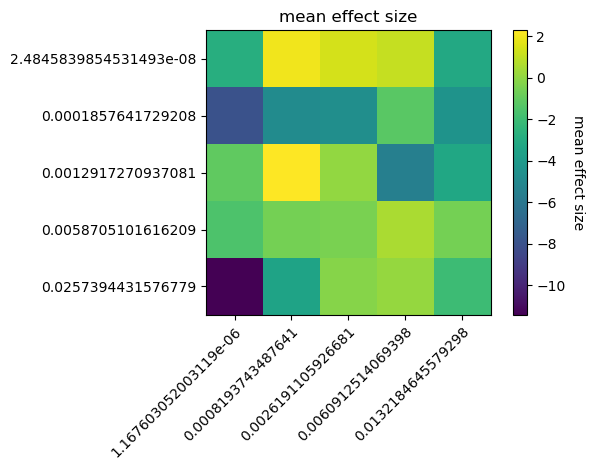

death,3,100


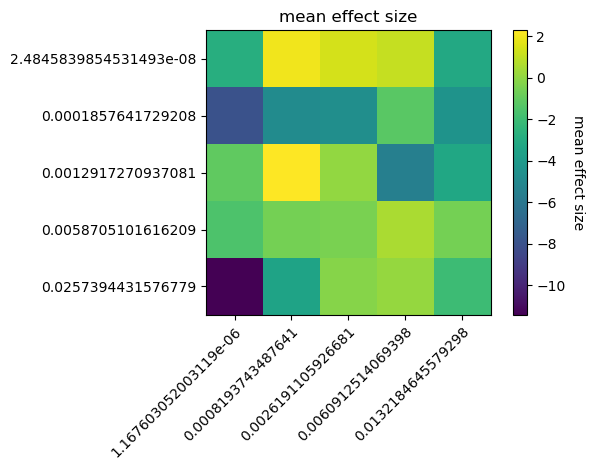

death,3,100


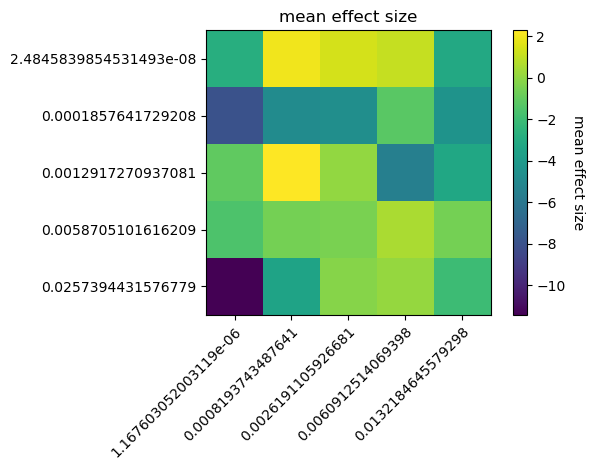

death,3,100


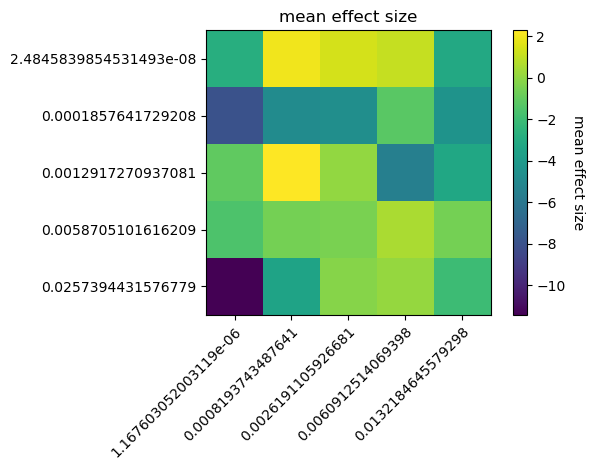

death,3,100


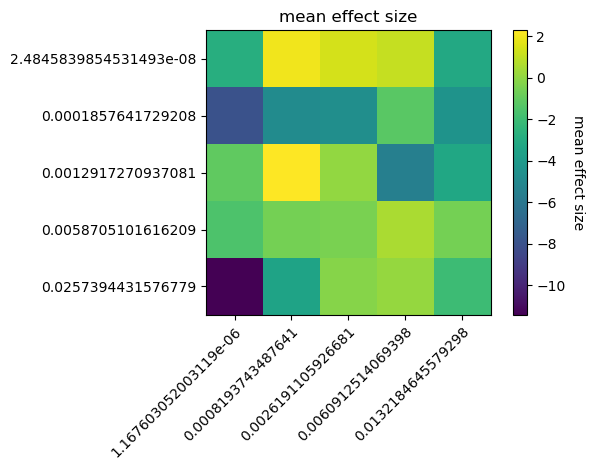

In [37]:
for outcome in [outcomes[0]]:    
    for duration in durations:
        for sampleSize in [sampleSizes[0]]:
            print(f"{outcomes[0]},{durations[0]},{sampleSizes[0]}")
            dataForPlot=meanReg[f"{outcomes[0]},{durations[0]},{sampleSizes[0]}"]
            fig, ax = plt.subplots()
            im = ax.imshow(dataForPlot)

            # Show all ticks and label them with the respective list entries
            ax.set_xticks(np.arange(len(cvRisks)), labels=cvRisks)
            ax.set_yticks(np.arange(len(dementiaRisks)), labels=dementiaRisks)
            ax.set(xlabel='cv risk, ylabel='dementia risk')

            # Rotate the tick labels and set their alignment.
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

            cbar = ax.figure.colorbar(im, ax=ax)
            cbar.ax.set_ylabel("mean effect size", rotation=-90, va="bottom")

            ax.set_title("mean effect size")
            fig.tight_layout()
            plt.show()

In [44]:
for outcome in [outcomes[0]]:    
    for duration in [durations[-1]]:
        for sampleSize in sampleSizes:
            print(meanReg[f"{outcome},{duration},{sampleSize}"][2,2])

3.7156049019649373
1.3183211960622134
-0.16097681057103316
0.044727485914438675
0.037546726080823156
-0.014448123293066393
0.00132693105649431
-0.008190438339666822
